In [1]:
# Librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from kmodes.kmodes import KModes
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from statsmodels.regression.linear_model import OLS
from sklearn.metrics import roc_curve, roc_auc_score, auc
import random
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Introduction

This dataset was published by IBM and it contains information about 7043 customers of a telecommunication company named Telco located in California. The company  provides services such as: Phone Service, Internet Service, Online Security, Multiple Lines, Device Protection, or Technical Support. Each customer can subscribe to any of those services. Additionally, more detailed informations are provided about the customers, including their CustomerID, gender, tenure, monthly and total charges, payment method, contract type, senior citizen status, partnernship status, dependent status and whether they left the company. 

The purpose of this project is to predict customer retention using the following 18 variables:

- `Gender` (Female or Male)
- `SeniorCitizen` (0 means the customer is less than 65 years old, 1 means the individual is 65 years or more.
- `Partner` (Indicates if the customer has a partner)
- `tenure` (Indicates the number of months the customer has been using the services of the company)
- `PhoneService` (Does the customer use Telco's phone service?)
- `MultipleLines` (Does the customer have multiple lines?)
- `InternetService` (Does the customer use Telco's multiple lines service?)
- `OnlineSecurity` (Does the customer use Telco's online security service?)
- `DeviceProtection` (Does the customer use Telco's device protection service?)
- `TechSupport` (Does the customer use Telco's technical support service?)
- `StreamingTV` (Does the customer stream TV?)
- `StreamingMovies` (Does the customer stream movies?)
- `Contract` (Different contract types: Month-to-month, One year, and Two year) 
- `PaperlessBilling` (Does the customer subscribe to paperless billing?)
- `PaymentMethod` (Credit card, electronic check, mailed check, or bank transfer)
- `Monthly Charges` (How much customers are being charged per month?)
- `Total Charges` (How much the customer are being charged per year?)
- `Churn` (Whether the customer left the company)

### Table of Content
1/ Descriptive Analysis


2/ Exploratory Data Analysis (EDA)

3/ Customer Segmentation

4/ Predictive Modeling
   a/ Logistic Regression
   b/ Decision Trees
   
5/ Feature Importance Analysis

6/ A|B Testing
   
4/ A predictive dashboard designed to forecast customer retention.

5/ Recommendations

6/ Cited

### Descriptive Analysis

Before conducting any analysis, it is essential to inspect the dataset to understand the variables it contains, summarize them, and present an overview.

Upon examination, it is evident that the majority of variables are categorical, except for `tenure`, `SeniorCitizen`, and `Churn`. Fortunately, there are no missing or duplicated values in the dataset, eliminating the need for data cleaning.

When focusing on numerical data, the average tenure is approximately 32 months, indicating that, on average, customers use the telecommunication service for approximately 2 years and 8 months. Most customers are under 65 years old, as the mean of SeniorCitizen is closer to 0. However, the mean of churn is closer to 1, indicating that a significant portion of customers left the company during this period. This is also an indication that this dataset is imbalanced.

In [2]:
# Get a preview of the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(df.tail(4))

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No         

In [3]:
# Create the function to transform the churn variable to a numerical variable
def transform_value(x):
    if x == 0:
        result = 'No'
    elif x == 1:
        result = 'Yes'
    return result

df['SeniorCitizen'] = df['SeniorCitizen'].apply(transform_value)

In [4]:
# Check for any missing values 
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
# Check for duplicates
df.duplicated().sum()

0

In [6]:
# Check the type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Descriptive Statistics
df.describe()

,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


## Exploratory Analysis 

This part of this report involves creating graphs and plots to observe any potential trends before running predictive models. Due to the fact that most variables are categorical, it limits the type of plots that are available to use. I made the choice to utilize bar plots as they are more appriopriate when the variables utilized are categorical. Since the goal is to observe the type of customers who are most likely to stop using the company's services.

Each variable was plotted along churn to build a profile on the customers ended their engament with the company. 
Based on those plots, those are the factors that influence churn rate:
- Age: Individuals who are less than 65 years old are less likely to stop using services at this company compared to those who are more than 65 years old.
- The Payment methods: Except for the customers who are using electronic check, those who are using the other forms of payments are more likely to keep using the services provided by the company.
- Dependency: Individuals who are dependent tend to continue utilizing the services of the company despite the fact they constitute a minority.
- The type of customers: Customers who used those services for more than 12 months are the most loyal customers as they leave the least.
- Internet Service: Customers who do not use internet are much more likely to continue using the services of the company.
- Subscription to addtional services: Individuals who subcribed to addtional services such as online backup, device protection, technical support, and online security.
- Monthly Charges: Customers who spend less than $50 are much more likely to not churn.
- Annual Charges: Customers who tend to spend more than $1000 as annual charges are more likely to keep using the company's services.


#### Additional Transformations of Variables 

After filtering the variable `tenure` to obtain a new variable titled `CustomerType`. The following is the classification that was applied:

  - `recently_onboarded_customers` are defined as individiduals who have been just joined the company.
  - `newcustomers` are defined as individiduals who have been with the company for less than 3 months.
  - `earlystagetermcustomers` are defined as individuals who have been with the company between 3 to 5 months.
  - `midtermcustomers` are defined as individuals who have been with the company between 6 to 11 months.
  - `longtermcustomers`are defined as individuals who have been with the company between 12 to 35 months.
  - `verylongtermcustomers` are defined as individiduals who have been with the company for more than 36 months.

The variables `TotalCharges` and `MonthlyCharges` were transformed into categorical variables to easily categorize customers' spending habits.

The following classification was applied to `MonthlyCharges`:

  - `high` are defined as individiduals who spent more than 100 per month.
  - `medium` are defined as individiduals who spent between 50 and 100 per month.
  - `low` are defined as individuals who spent less than 50 per month.
  
The following classification was applied to `TotalCharges`:

  - `high` are defined as individiduals who spent more than 5000 per month.
  - `medium` are defined as individiduals who spent between 1000 and 5000 per month.
  - `low` are defined as individuals who spent less than 1000 per month.


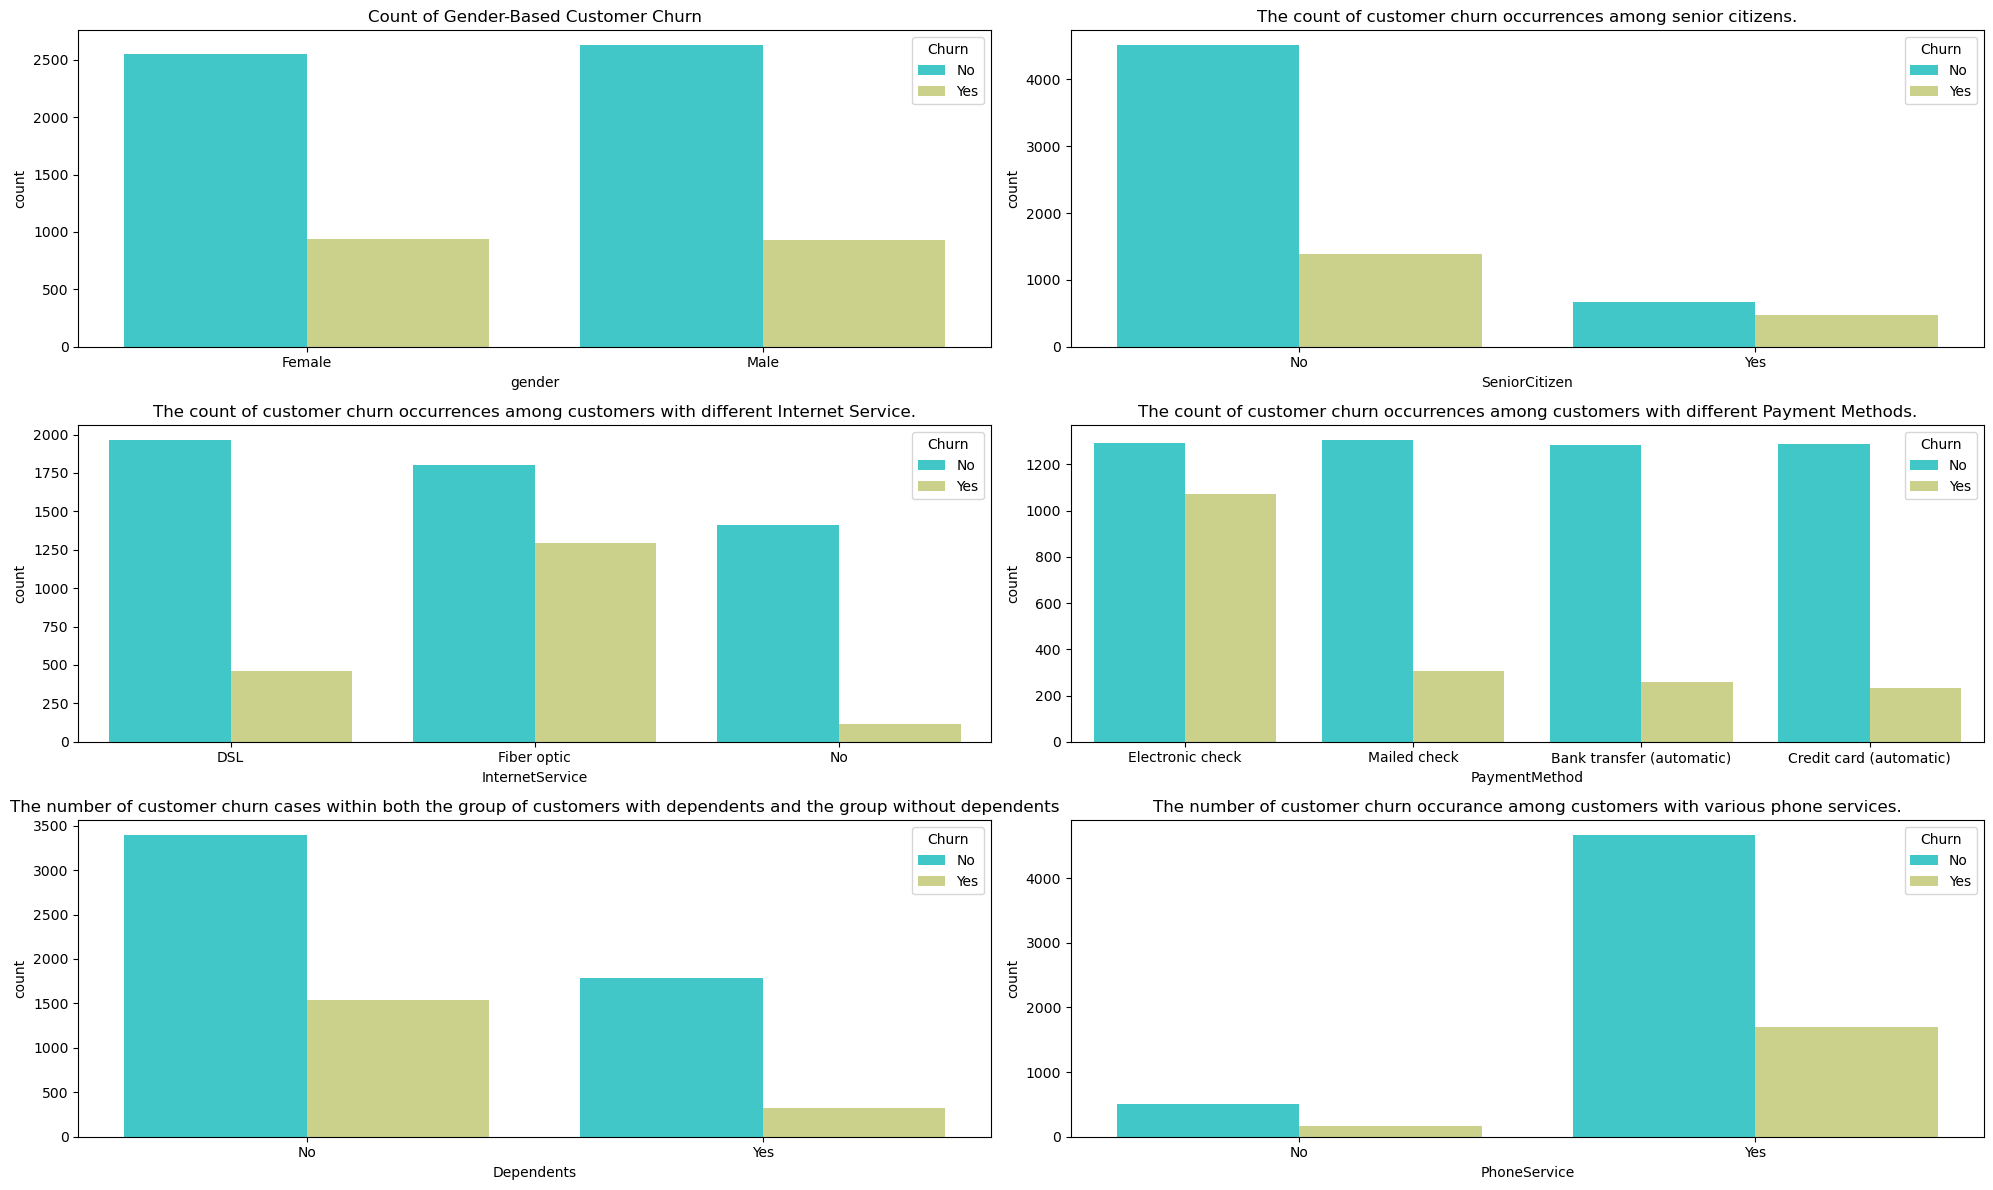

In [9]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 12))
# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()
sns.countplot(x='gender',data=df, palette='rainbow',hue='Churn', ax=axes[0])
axes[0].set_title('Count of Gender-Based Customer Churn')
sns.countplot(x='SeniorCitizen',data=df, palette='rainbow',hue='Churn', ax=axes[1])
axes[1].set_title('The count of customer churn occurrences among senior citizens.')
sns.countplot(x='InternetService',data=df, palette='rainbow',hue='Churn', ax = axes[2])
axes[2].set_title('The count of customer churn occurrences among customers with different Internet Service.')
sns.countplot(x='PaymentMethod',data=df, palette='rainbow',hue='Churn', ax=axes[3])
axes[3].set_title('The count of customer churn occurrences among customers with different Payment Methods.')
sns.countplot(x='Dependents',data=df, palette='rainbow',hue='Churn', ax=axes[4])
axes[4].set_title('The number of customer churn cases within both the group of customers with dependents and the group without dependents')
sns.countplot(x='PhoneService',data=df, palette='rainbow',hue='Churn', ax=axes[5])
axes[5].set_title('The number of customer churn occurance among customers with various phone services.')
# Adjust layout to prevent overlapping
plt.tight_layout()
# Show the combined plots
plt.show()

In [10]:

first_condition = df['tenure'] > 36
second_condition = (df['tenure'] >= 12) & (df['tenure'] <= 35)
third_condition = (df['tenure'] >= 6) & (df['tenure'] <= 11)
fourth_condition = (df['tenure'] >= 3) & (df['tenure'] <= 5)
fifth_condition = df['tenure'] < 3

conditions = [
    first_condition,
    second_condition,
    third_condition,
    fourth_condition,
    fifth_condition,
]

values = [
    'verylongtermcustomers',
    'longtermcustomers',
    'midtermcustomers',
    'earlystagetermcustomers',
    'newcustomers',  
]

# Create the 'CustomerType' column based on conditions and values
df['CustomerType'] = np.select(conditions, values, default = 'recently_onboarded_customers')

# Display the DataFrame
print(df)


      customerID  gender SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female            No     Yes         No       1   
1     5575-GNVDE    Male            No      No         No      34   
2     3668-QPYBK    Male            No      No         No       2   
3     7795-CFOCW    Male            No      No         No      45   
4     9237-HQITU  Female            No      No         No       2   
...          ...     ...           ...     ...        ...     ...   
7038  6840-RESVB    Male            No     Yes        Yes      24   
7039  2234-XADUH  Female            No     Yes        Yes      72   
7040  4801-JZAZL  Female            No     Yes        Yes      11   
7041  8361-LTMKD    Male           Yes     Yes         No       4   
7042  3186-AJIEK    Male            No      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes    

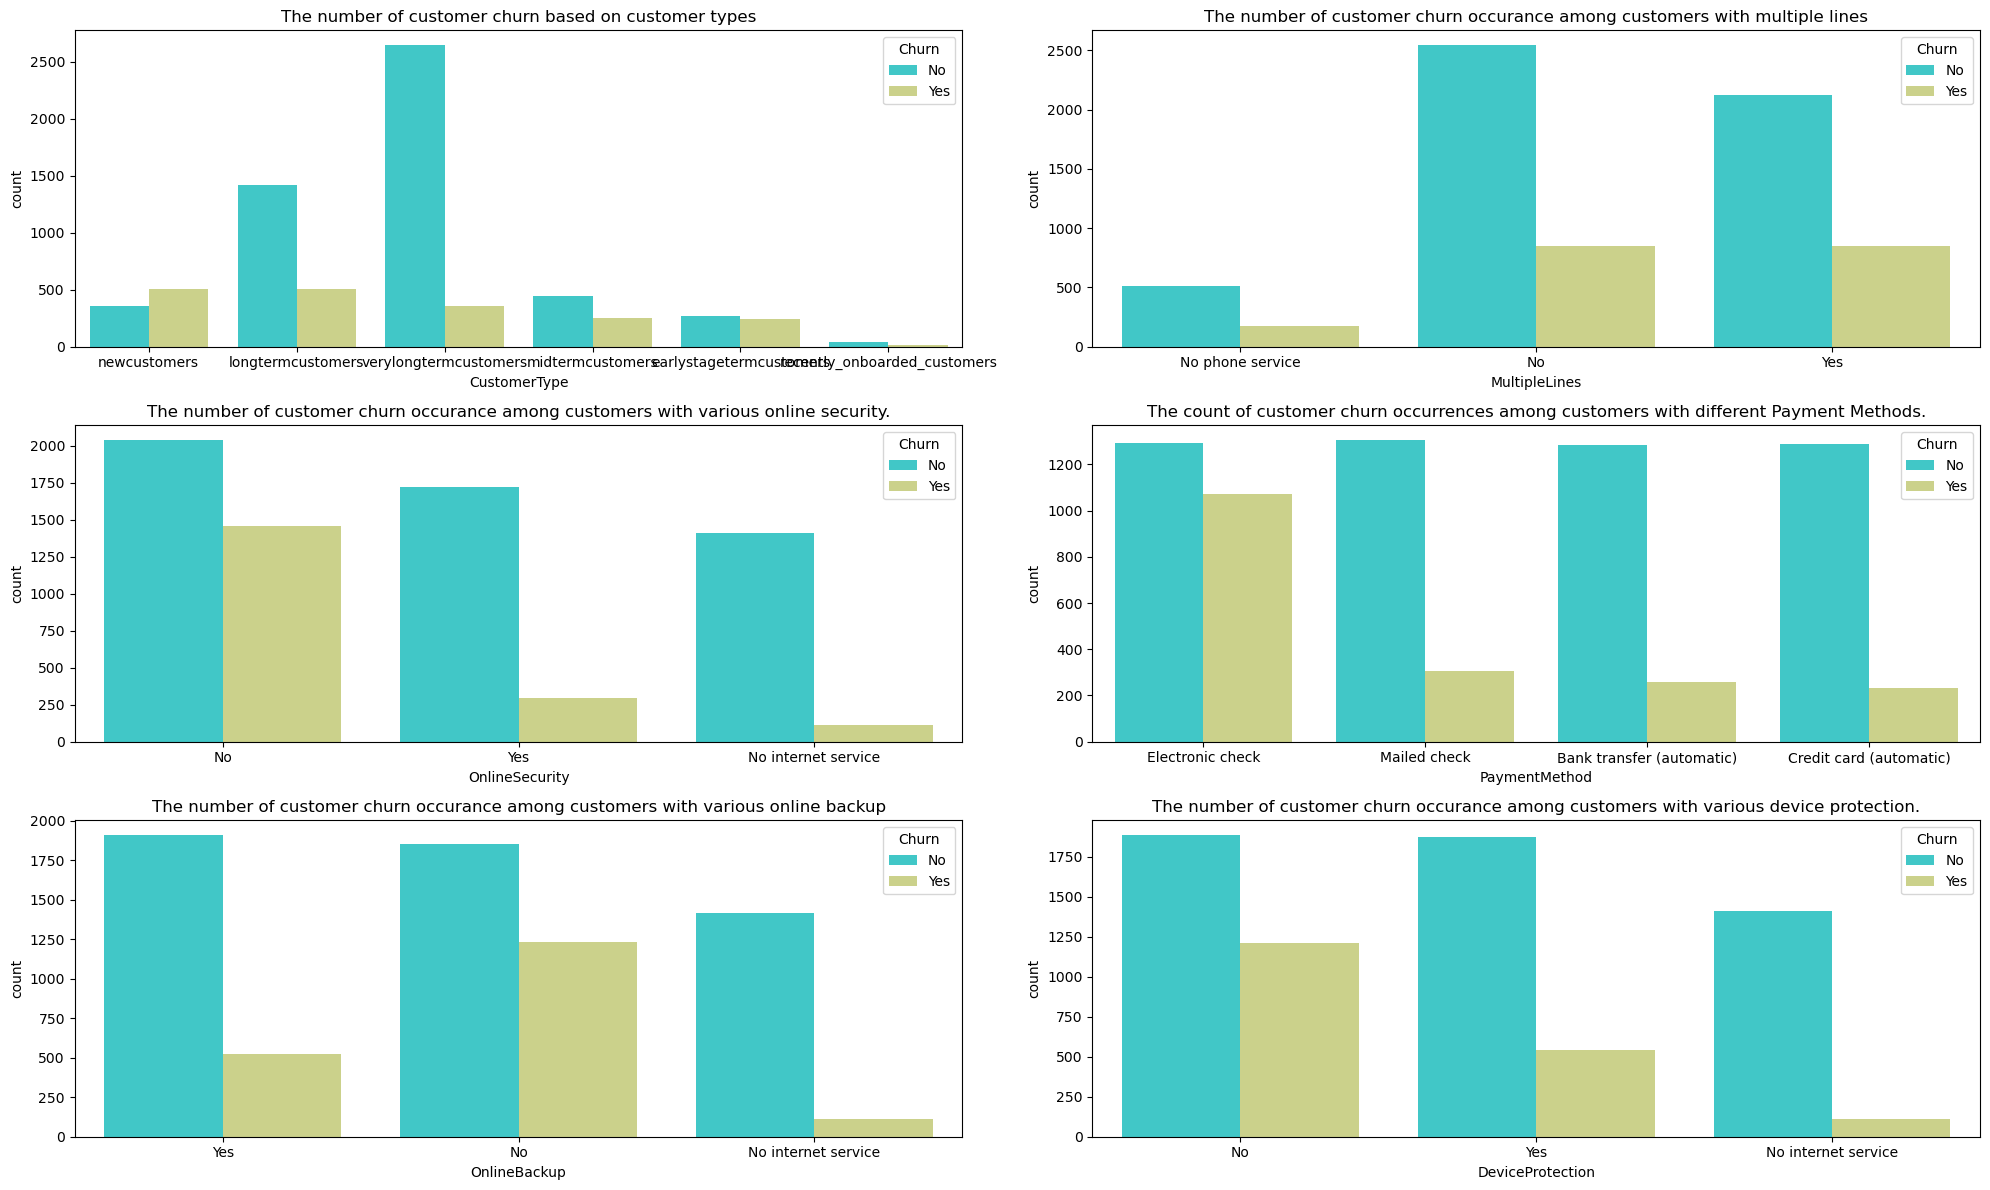

In [11]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 12))
# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()
sns.countplot(x='CustomerType',data=df, palette='rainbow',hue='Churn', ax=axes[0])
axes[0].set_title('The number of customer churn based on customer types')
sns.countplot(x='MultipleLines',data=df, palette='rainbow',hue='Churn', ax=axes[1])
axes[1].set_title('The number of customer churn occurance among customers with multiple lines')
sns.countplot(x='OnlineSecurity',data=df, palette='rainbow',hue='Churn', ax = axes[2])
axes[2].set_title('The number of customer churn occurance among customers with various online security.')
sns.countplot(x='PaymentMethod',data=df, palette='rainbow',hue='Churn', ax=axes[3])
axes[3].set_title('The count of customer churn occurrences among customers with different Payment Methods.')
sns.countplot(x='OnlineBackup',data=df, palette='rainbow',hue='Churn', ax=axes[4])
axes[4].set_title('The number of customer churn occurance among customers with various online backup')
sns.countplot(x='DeviceProtection',data=df, palette='rainbow',hue='Churn', ax=axes[5])
axes[5].set_title('The number of customer churn occurance among customers with various device protection.')
# Adjust layout to prevent overlapping
plt.tight_layout()
# Show the combined plots
plt.show()

In [12]:
# Understanding Monthly Charges
df[df['MonthlyCharges'] < 50]['MonthlyCharges'].sum()

62940.1

In [13]:
df['MonthlyCharges'].sum()
# They are making 456,116 per month

456116.6

In [14]:
df[df['MonthlyCharges'] > 100]['MonthlyCharges'].sum()

96212.70000000001

In [15]:
df[(df['MonthlyCharges'] > 50) & (df['MonthlyCharges'] < 100)]['MonthlyCharges'].sum()

296113.8

In [16]:
first_condition2 = df['MonthlyCharges'] > 100
second_condition2 = (df['MonthlyCharges'] >= 50) & (df['MonthlyCharges'] <= 100)
third_condition2 = df['MonthlyCharges'] < 50

filtered_df3 = df.copy()

conditions = [
    first_condition2,
    second_condition2,
    third_condition2
]

values = [
    'high',
    'medium',
    'low'
]

# Create the 'CustomerType' column based on conditions and values
df['MonthlyCharges'] = np.select(conditions, values)

# Display the DataFrame
print(df)

      customerID  gender SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female            No     Yes         No       1   
1     5575-GNVDE    Male            No      No         No      34   
2     3668-QPYBK    Male            No      No         No       2   
3     7795-CFOCW    Male            No      No         No      45   
4     9237-HQITU  Female            No      No         No       2   
...          ...     ...           ...     ...        ...     ...   
7038  6840-RESVB    Male            No     Yes        Yes      24   
7039  2234-XADUH  Female            No     Yes        Yes      72   
7040  4801-JZAZL  Female            No     Yes        Yes      11   
7041  8361-LTMKD    Male           Yes     Yes         No       4   
7042  3186-AJIEK    Male            No      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes    

In [17]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Convert column to numeric values

In [18]:
df[df['TotalCharges'] < 1000]['TotalCharges'].sum()

1037347.3999999999

In [19]:
df['TotalCharges'].sum()

16056168.7

In [20]:
df[df['TotalCharges'] > 5000]['TotalCharges'].sum()

7316485.75

In [21]:
df[(df['TotalCharges'] > 1000) & (df['TotalCharges'] < 5000)]['TotalCharges'].sum()

7702335.55

In [22]:
first_condition3 = df['TotalCharges'] > 5000
second_condition3 = (df['TotalCharges'] >= 1000) & (df['TotalCharges'] <= 5000)
third_condition3 = df['TotalCharges'] < 1000

filtered_df4 = df.copy()

conditions = [
    first_condition3,
    second_condition3,
    third_condition3
]

values = [
    'high',
    'medium',
    'low'
]

# Create the 'CustomerType' column based on conditions and values
df['TotalCharges'] = np.select(conditions, values)

# Display the DataFrame
print(df)

      customerID  gender SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female            No     Yes         No       1   
1     5575-GNVDE    Male            No      No         No      34   
2     3668-QPYBK    Male            No      No         No       2   
3     7795-CFOCW    Male            No      No         No      45   
4     9237-HQITU  Female            No      No         No       2   
...          ...     ...           ...     ...        ...     ...   
7038  6840-RESVB    Male            No     Yes        Yes      24   
7039  2234-XADUH  Female            No     Yes        Yes      72   
7040  4801-JZAZL  Female            No     Yes        Yes      11   
7041  8361-LTMKD    Male           Yes     Yes         No       4   
7042  3186-AJIEK    Male            No      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes    

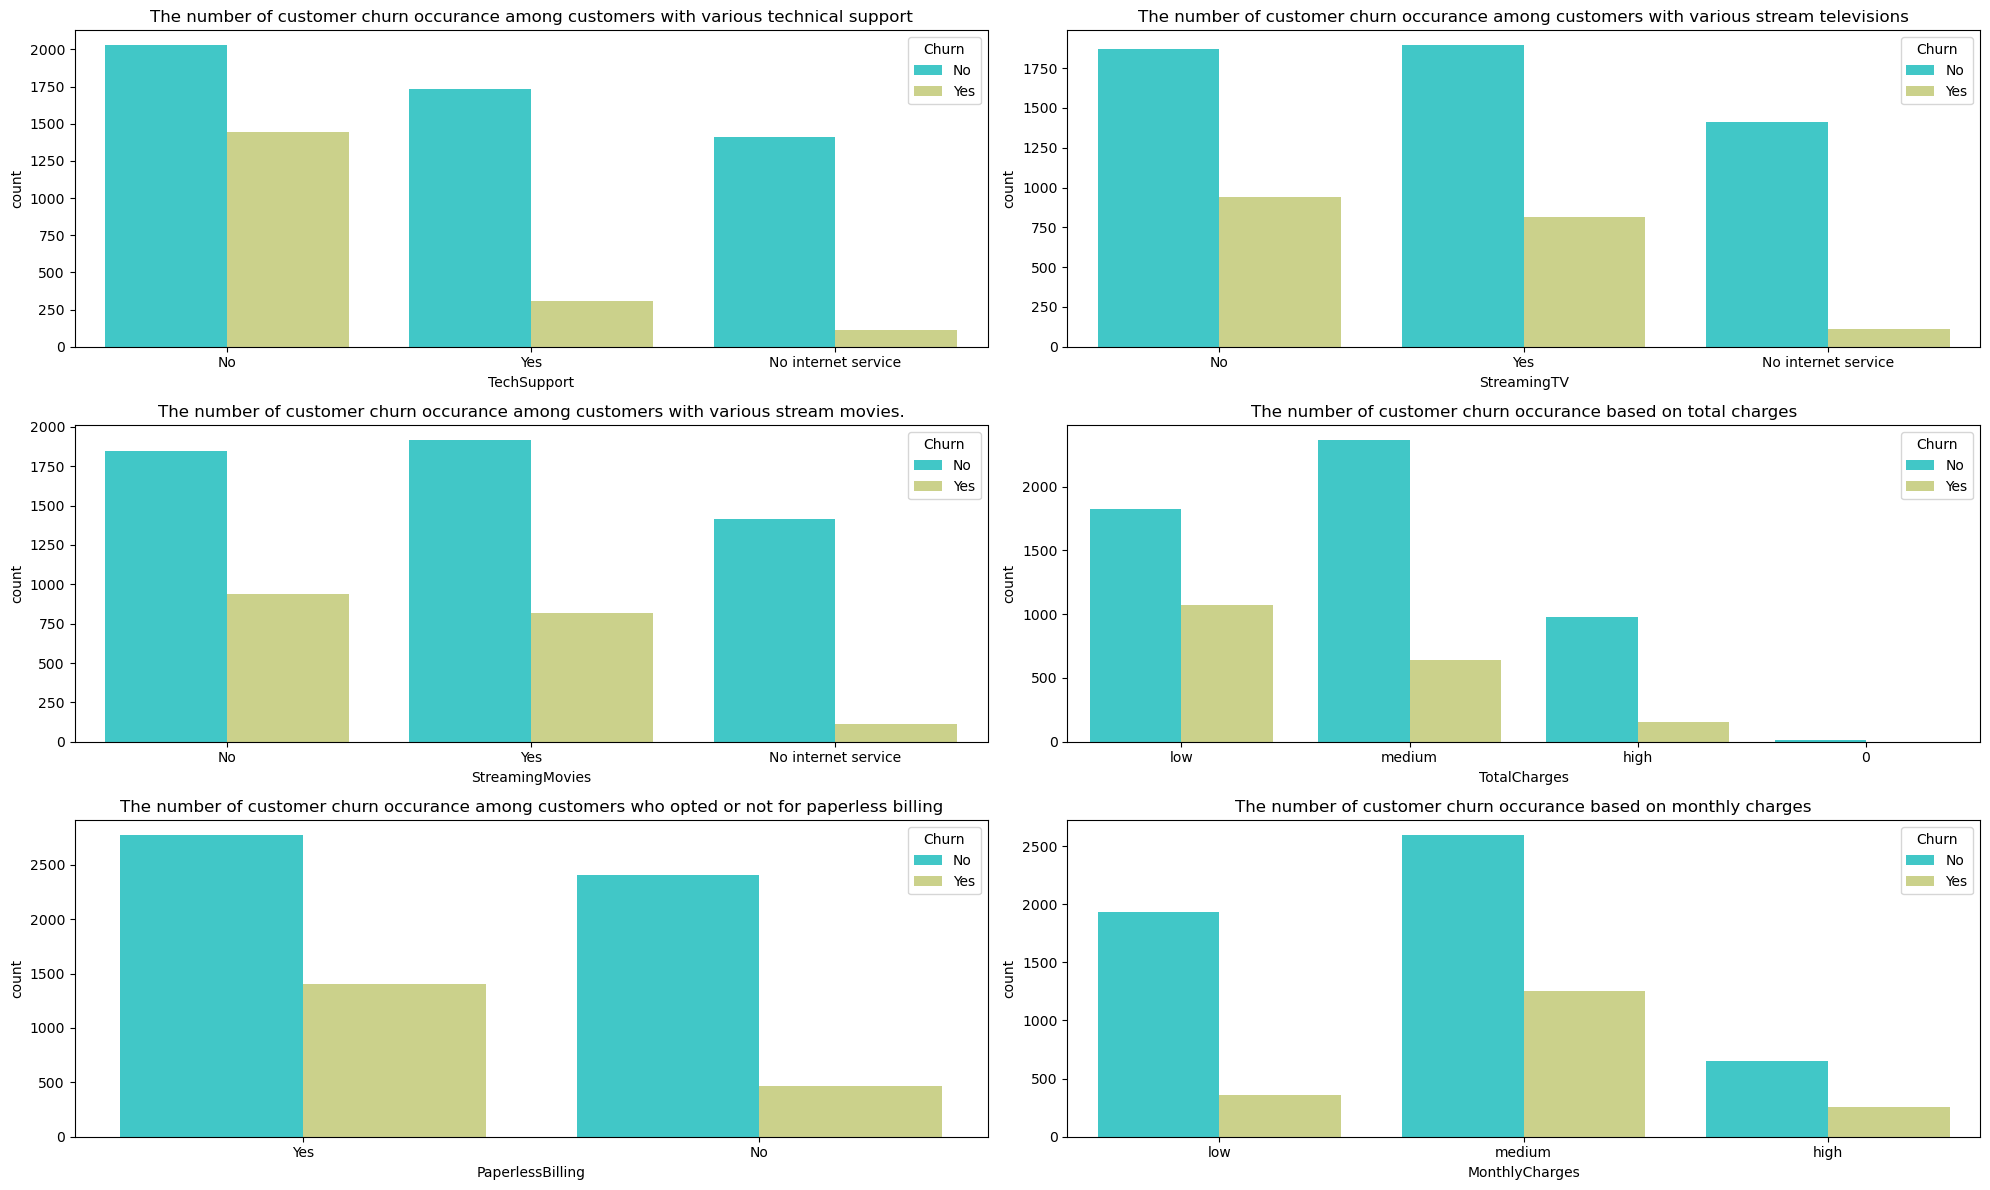

In [23]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 12))
# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()
sns.countplot(x='TechSupport',data=df, palette='rainbow',hue='Churn', ax=axes[0])
axes[0].set_title('The number of customer churn occurance among customers with various technical support')
sns.countplot(x='StreamingTV',data=df, palette='rainbow',hue='Churn', ax=axes[1])
axes[1].set_title('The number of customer churn occurance among customers with various stream televisions')
sns.countplot(x='StreamingMovies',data=df, palette='rainbow',hue='Churn', ax = axes[2])
axes[2].set_title('The number of customer churn occurance among customers with various stream movies.')
sns.countplot(x='TotalCharges',data=df, palette='rainbow',hue='Churn', ax=axes[3])
axes[3].set_title('The number of customer churn occurance based on total charges')
sns.countplot(x='PaperlessBilling',data=df, palette='rainbow',hue='Churn', ax=axes[4])
axes[4].set_title('The number of customer churn occurance among customers who opted or not for paperless billing')
sns.countplot(x='MonthlyCharges',data=df, palette='rainbow',hue='Churn', ax=axes[5])
axes[5].set_title('The number of customer churn occurance based on monthly charges')
# Adjust layout to prevent overlapping
plt.tight_layout()
# Show the combined plots
plt.show()

## Customer Segmentation

Observing the general trends of a dataset can be informative but customer segmentation allows to build a detailed profile of the clients. The goal is to divide the dataset into cluster to analyze customers' behaviors and tailor strategies to target them. In this specific case, it would be building a strategy to analyze the profile of the customers who decided to stop using the services of the company and either improve the marketing strategies or enhance their customer experience. 

To achieve this goal, the elbow method was first used to determine the optimal number of clusters using the plot which was 3. 

Cluster 0
This individual is a single professional with a stable income less than 65 years old (25% of the senior citizen are placed in this cluster), who prefers is budget conscious since 
their annual spending with the company is less than $1000. This individual does not stream movies or TV and prefer using traditional or alternative forms of entertainment. This customer prefers month-to-month and as a result as no loyalty to the company. 

Cluster 1
This individual are less than 65 years old (from different age groups) and have a partner. They are either family oriented or relationship centric and is potential tech savvy. TAs a result, this customer is more likely to invest in a more comprehensive package. They are generally satisfied with those services.

Cluster 2
This individual is less than 65 years old and they are cost conscious to expenses. They like to traditional method for bill payment. This customer does not use internet service and is using those services for more than 36 months and has been satisfied.



In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [26]:
df.drop(['customerID', 'tenure'], axis=1, inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            7043 non-null   object
 1   SeniorCitizen     7043 non-null   object
 2   Partner           7043 non-null   object
 3   Dependents        7043 non-null   object
 4   PhoneService      7043 non-null   object
 5   MultipleLines     7043 non-null   object
 6   InternetService   7043 non-null   object
 7   OnlineSecurity    7043 non-null   object
 8   OnlineBackup      7043 non-null   object
 9   DeviceProtection  7043 non-null   object
 10  TechSupport       7043 non-null   object
 11  StreamingTV       7043 non-null   object
 12  StreamingMovies   7043 non-null   object
 13  Contract          7043 non-null   object
 14  PaperlessBilling  7043 non-null   object
 15  PaymentMethod     7043 non-null   object
 16  MonthlyCharges    7043 non-null   object
 17  TotalCharges  

In [30]:
# Specify the indices of categorical columns
categorical_indices = [1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [31]:
# Calculate cost for different values of k
cost_cao = []

In [32]:
for k in range(1, 20):
    kmodes_cao = KModes(n_clusters=k, init='Cao', n_init=2, verbose=0)
    clusters_cao = kmodes_cao.fit_predict(df.values[:, categorical_indices])
    cost_cao.append(kmodes_cao.cost_)


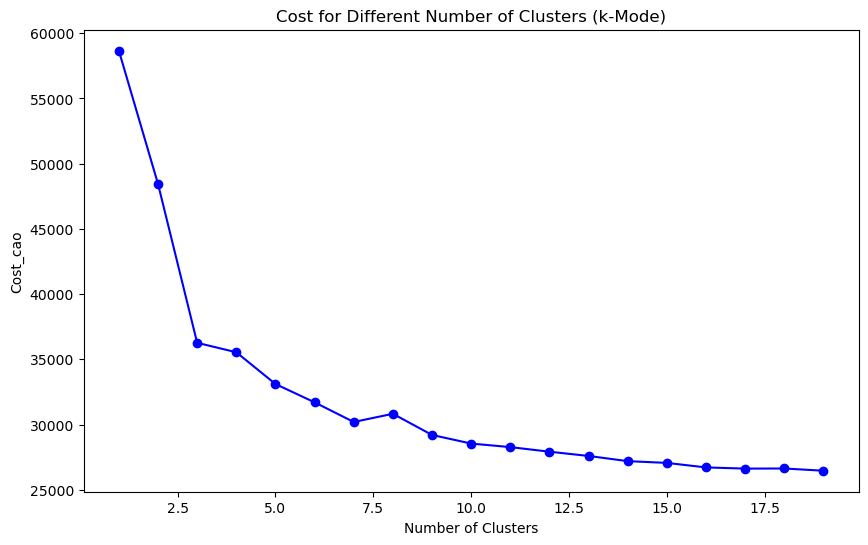

In [33]:
# Plot the cost for different values of k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), cost_cao, marker='o', linestyle='-', color='b')
plt.title('Cost for Different Number of Clusters (k-Mode)')
plt.xlabel('Number of Clusters')
plt.ylabel('Cost_cao')
plt.show()

# The elbow in the graph is the third-cluster mark

In [34]:
# Choose the optimal number of clusters (replace this with your optimal_k)
optimal_k_cao = 3

In [35]:
# Perform clustering with optimal_k
kmodes_cao = KModes(n_clusters=optimal_k_cao, init='cao', n_init=2, verbose=0)

In [36]:
clusters_cao = kmodes_cao.fit_predict(df.values[:, categorical_indices])

In [37]:
# Add the cluster labels to the original DataFrame
df['Clusters_cao'] = clusters_cao

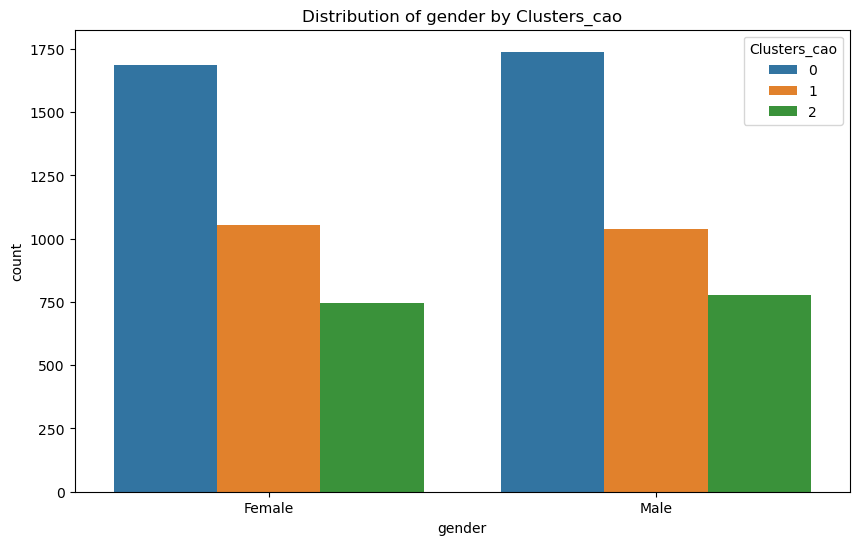

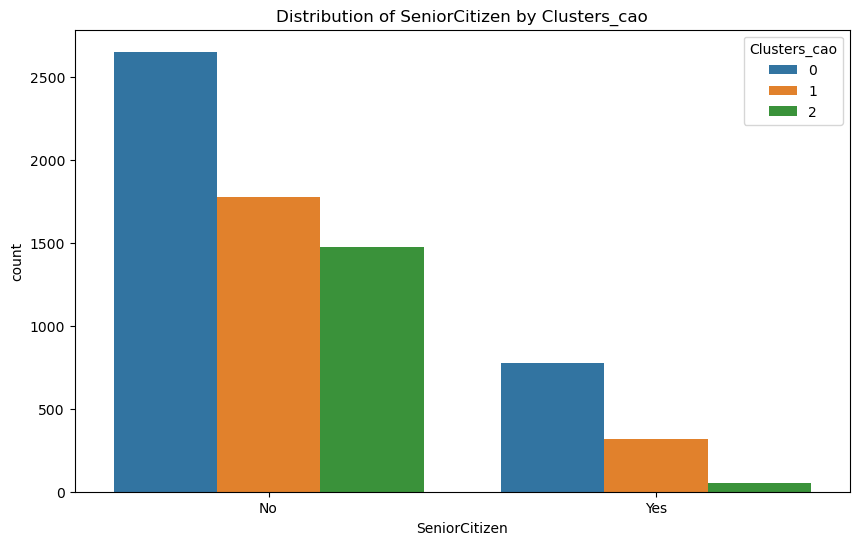

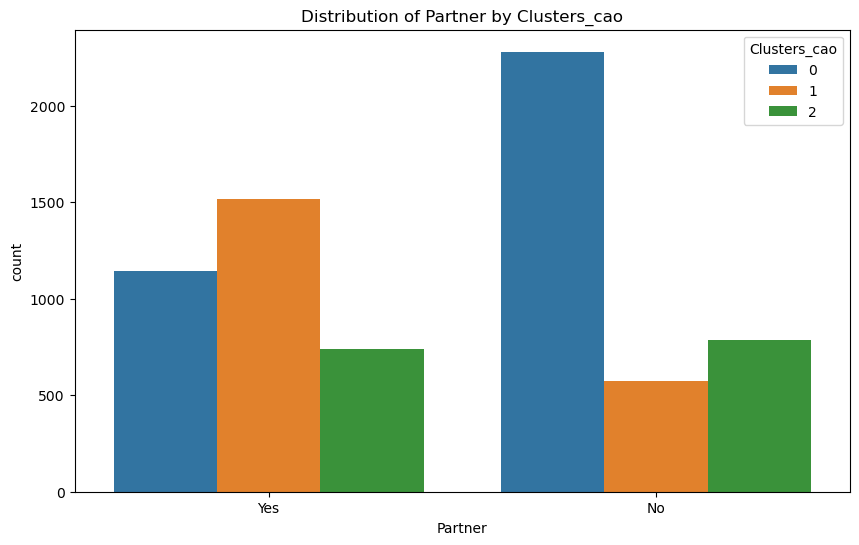

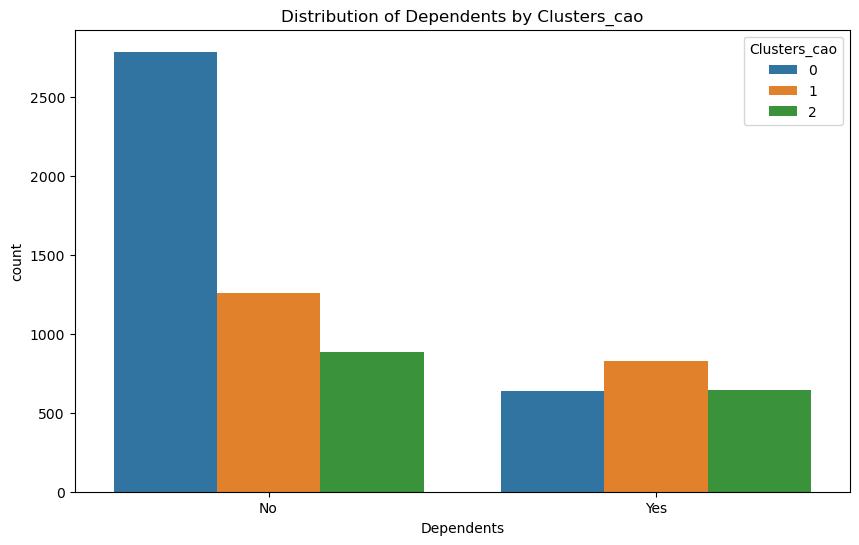

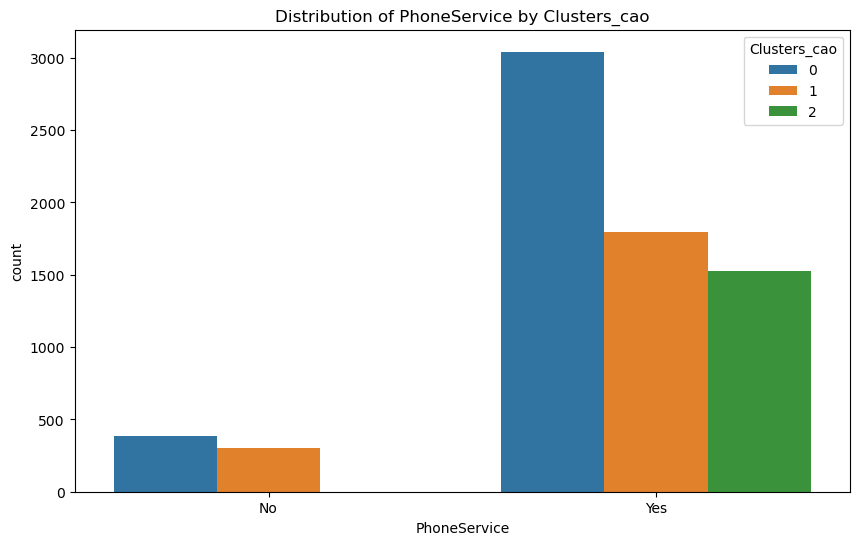

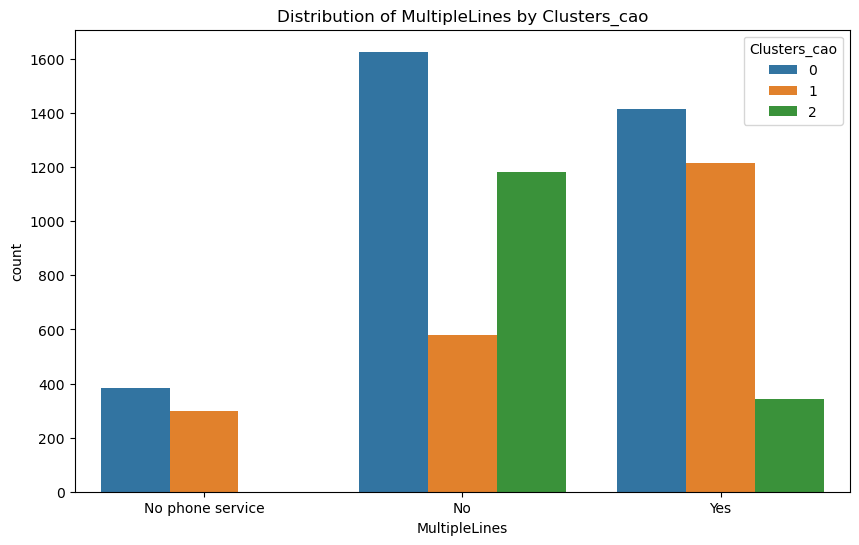

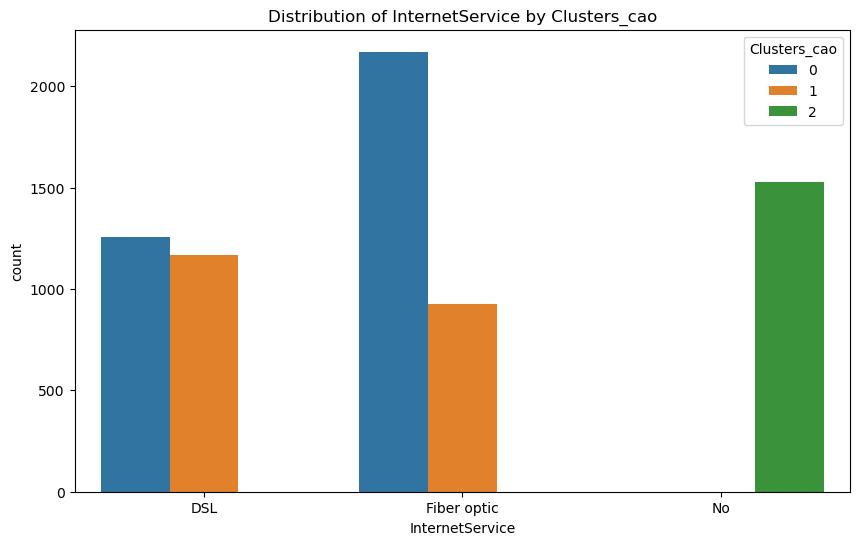

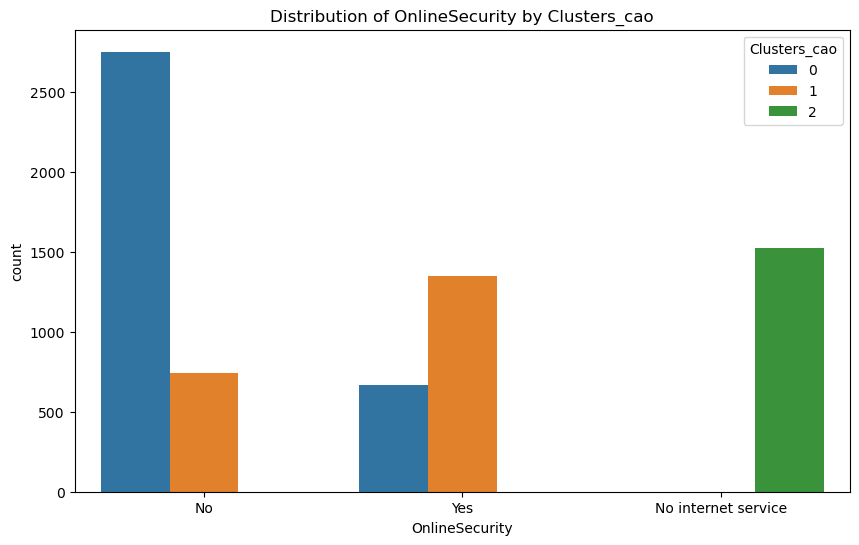

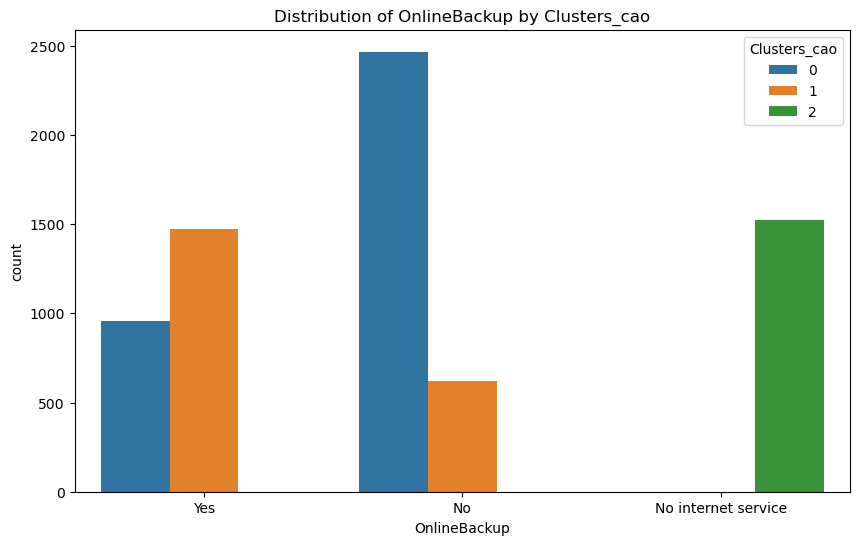

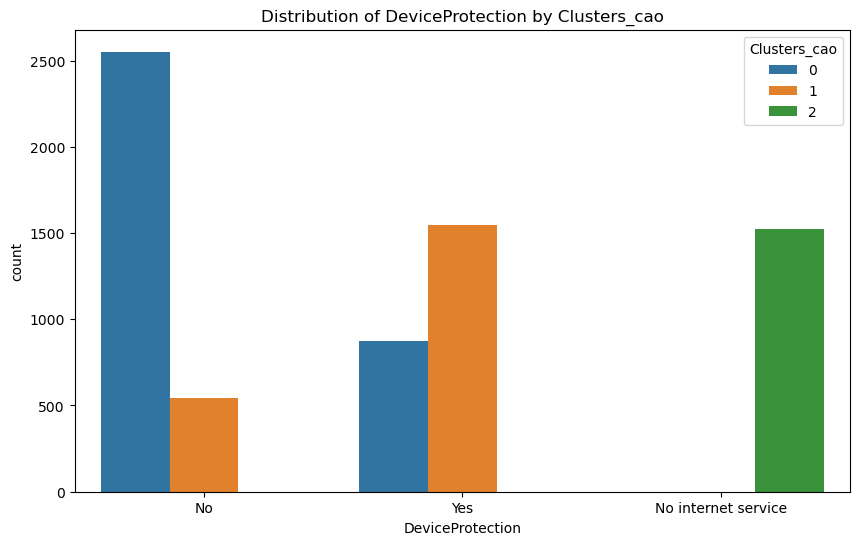

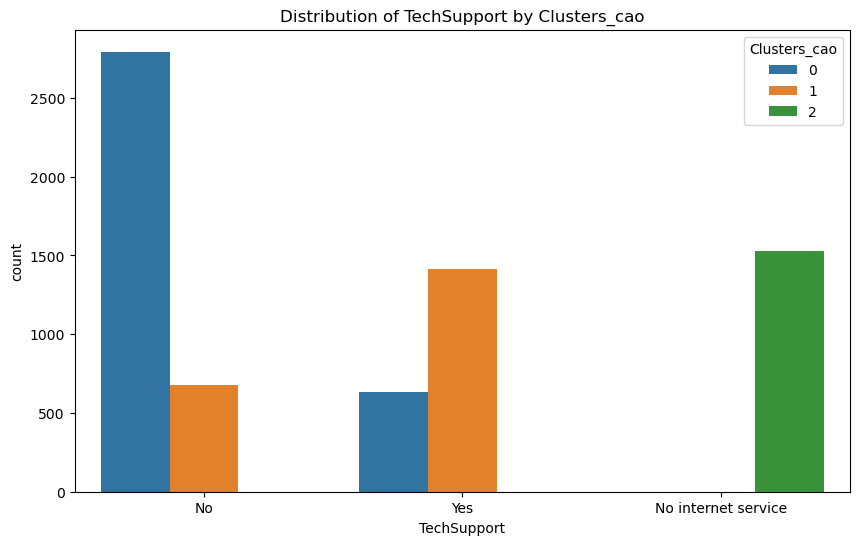

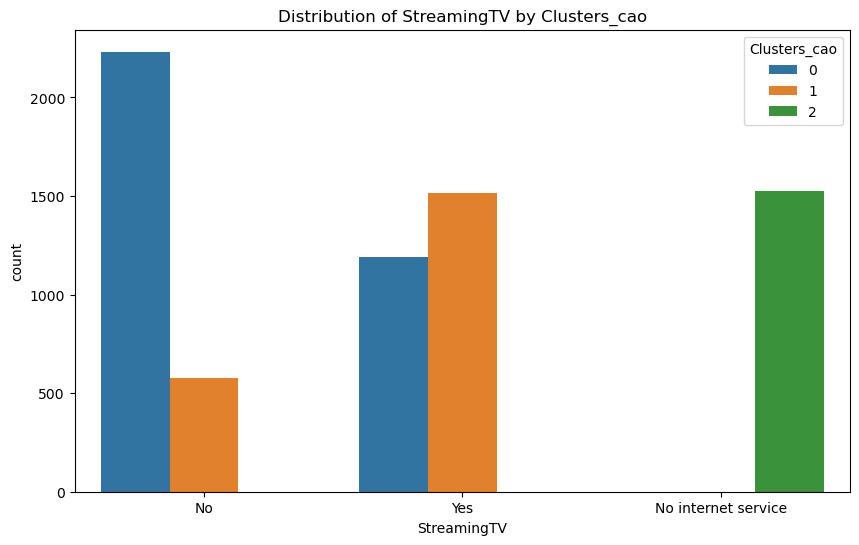

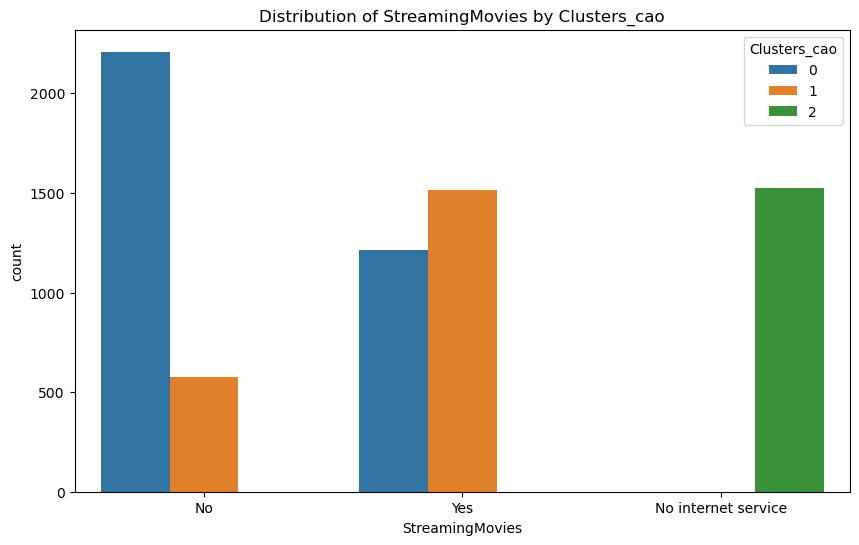

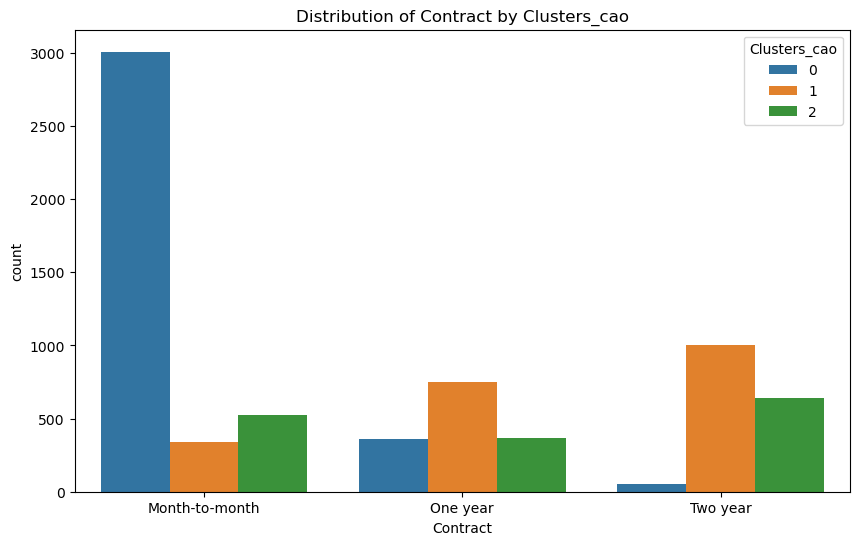

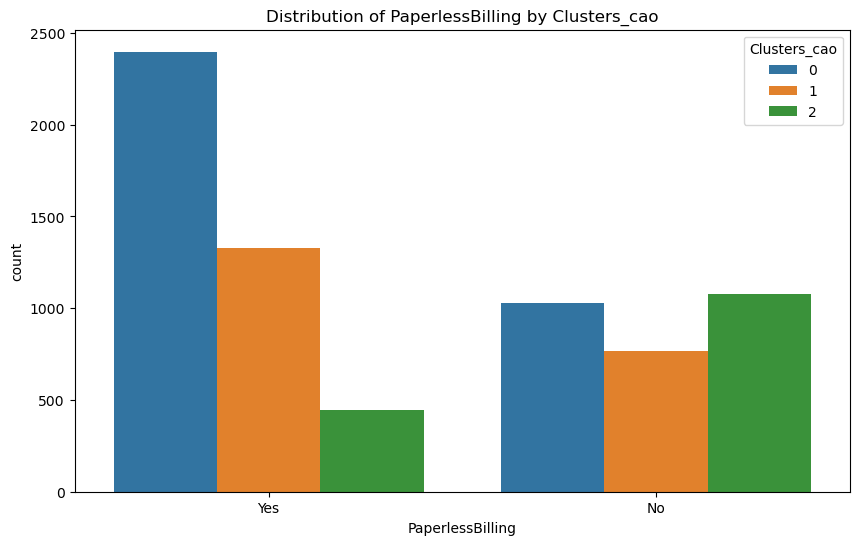

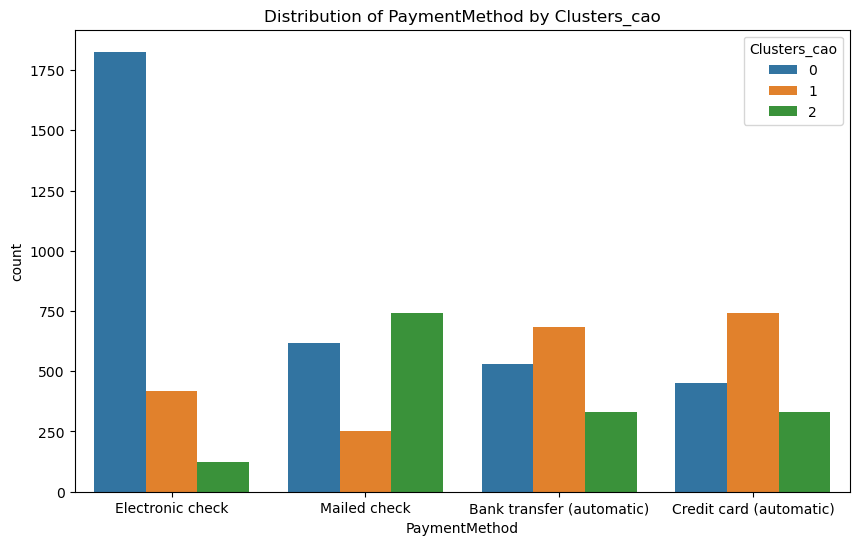

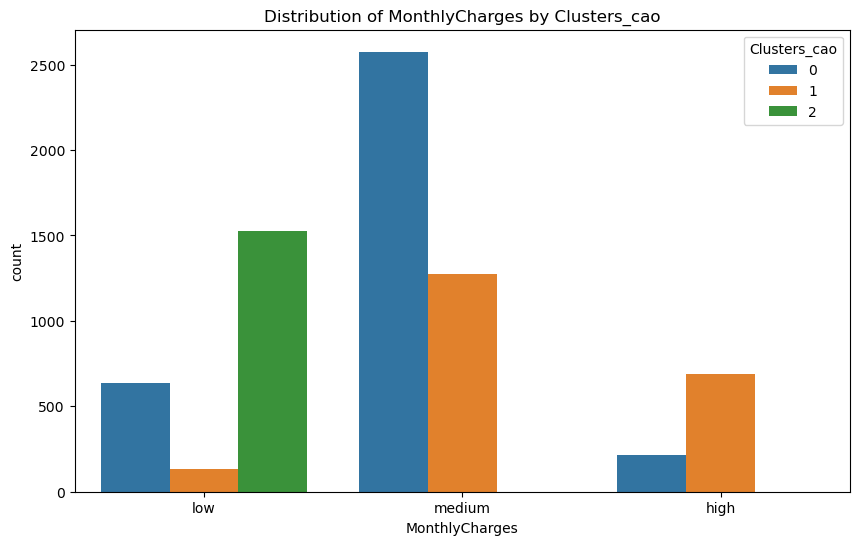

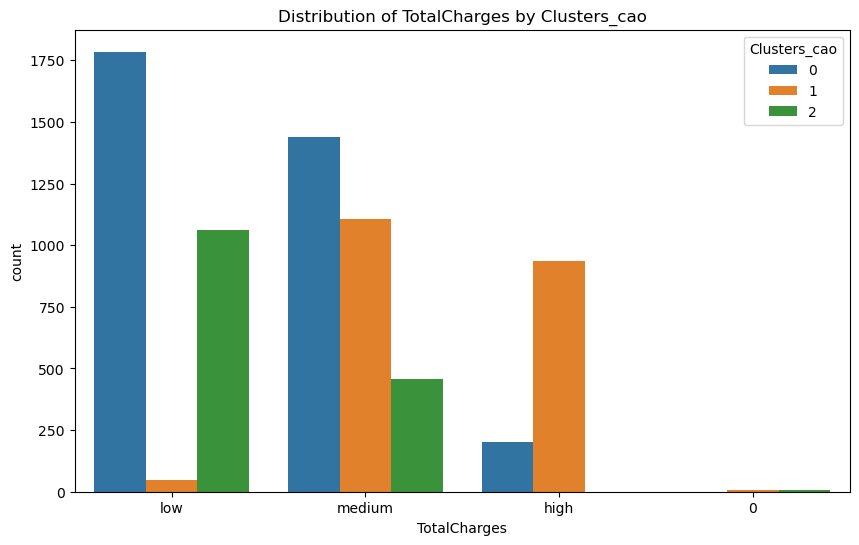

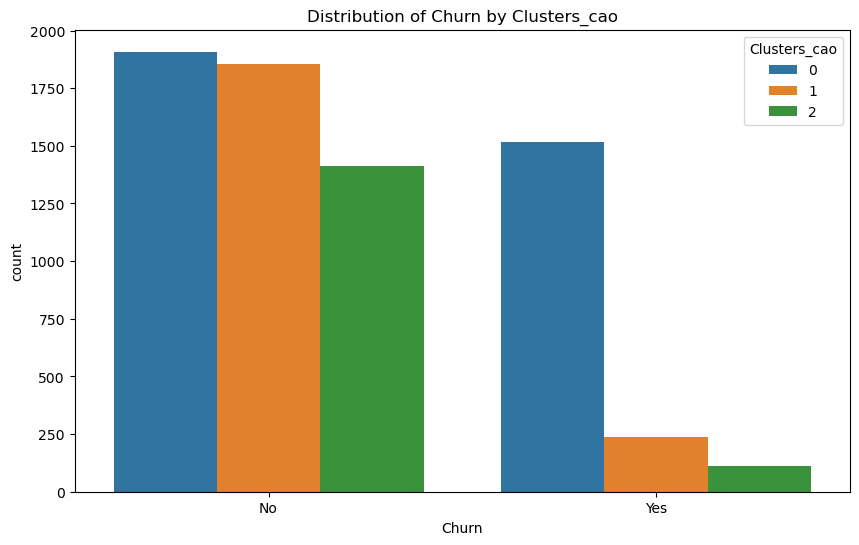

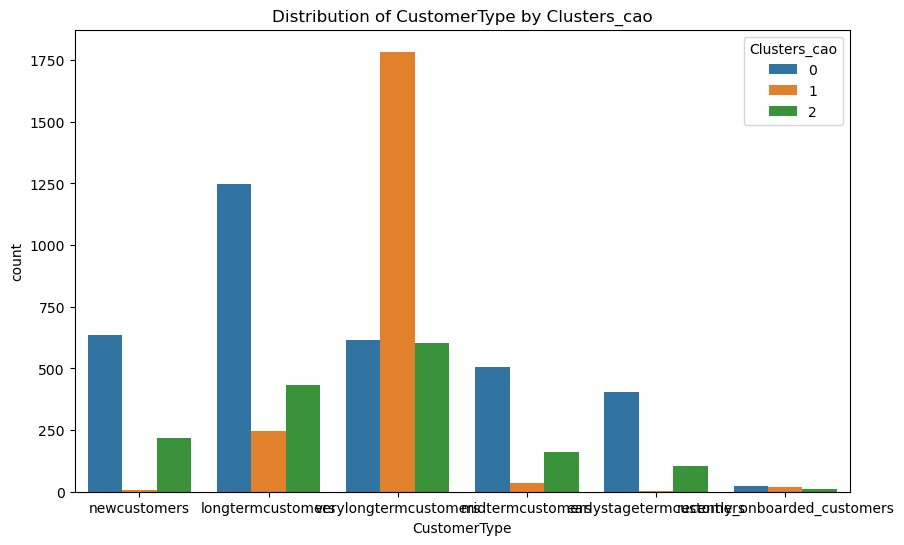

In [38]:
# Visualize the distribution of clusters for each categorical variable
for col in df.columns:
    if col != 'Clusters_cao':
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, hue='Clusters_cao', data=df)
        plt.title(f'Distribution of {col} by Clusters_cao')
        plt.show()
        
        
# Cluster 0:

# - no to seniorcitizen
# - no partner
# - independent
# - yes phone service
# - have multiple lines or not
# - most of them have fiber optic 
# - most of them have no online security
# - no online backup
# - no device protection
# - no tech support
# - no streaming tv
# - no streaming movies 
# - month to month contract do not like long term contracts
# - paperlessbilling 
# - electronic check 
# - mostly medium monthly charges 
# - between low and medium annual charges 
# - this profile tends to stay with the company
# - this profile is a longtermcustomers and newcustomers


# Cluster 1
# not senior citizen
# most of them have partner
# between independent and dependent
# have phone service
# have multiples lines 
# have DSL
# divided between online and no online security
# have online backup
# have device protection
# have tech support 
# are streaming TV
# are streaming movies
# like long term contracts
# divided for paperless billing
# prefer bank transfer or credit card
# medium monthly charges
# medium/high annual total charges
# most of them are loyal
# verylongtermcustomers and longtermcustomers

# Cluster 2
# most of them are not senior citizens
# half/half for partner
# divided for dependences
# have phone service 
# have multiple lines
# have no internet services
# no streaming/backup/device protection/ tech support
# divided between month to month and long term contracts
# no paperlessbilling 
# prefer mailed check 
# low monthly charges 
# low annual charges


In [39]:
# Features and target variable
X = df.drop('Clusters_cao', axis=1)  # Features excluding the cluster labels
y = df['Clusters_cao']  # Target variable

In [40]:
X = pd.get_dummies(X, columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService','MultipleLines','InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies','Contract', 'PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges','CustomerType'], drop_first=True)

In [41]:
# Encode target variable as numeric
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [42]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [43]:
# Build k-NN model
knn_model = KNeighborsClassifier(n_neighbors=3) 

In [44]:
# Train the model
knn_model.fit(X_train, y_train)

ValueError: could not convert string to float: 'No'

In [ ]:
# Make predictions
y_pred = knn_model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

In [ ]:
# Build Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

In [ ]:
# Train the model
dt_model.fit(X_train, y_train)

In [ ]:
# Make predictions
y_pred_dt = dt_model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt:.2f}')

In [ ]:
# Split the data into training and testing sets
#X = df[[  'gender',
#          'SeniorCitizen',
#          'Partner',
#          'Dependents', 
#          'PhoneService',
#          'MultipleLines',
#          'InternetService',
#          'OnlineSecurity', 
#          'DeviceProtection', 
#          'TechSupport', 
#          'StreamingTV',
#          'StreamingMovies',
#           'Contract', 
#          'PaperlessBilling',
#          'PaymentMethod',
#           'MonthlyCharges',
#           'TotalCharges',
#           'CustomerType']]  # Replace with your actual feature columns
#y = df['Churn'] 
#X = pd.get_dummies(X, columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService','MultipleLines','InternetService','OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies','Contract', 'PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges','CustomerType'], drop_first=True)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#Check if there are imbalanced classes.
#y_train.value_counts()

In [ ]:
#X_test

In [ ]:
# Fix the imbalance
#pos_index = y_train[y_train.values == 1].index
#neg_index = y_train[y_train.values == 0].index
#if len(pos_index) > len(neg_index):
#    higher = pos_index
#    lower = neg_index
#else:
#    higher = neg_index
#    lower = pos_index
#random.seed(0)
#higher = np.random.choice(higher, size=len(lower))
#lower = np.asarray(lower)
#new_indexes = np.concatenate((lower, higher))
#X_train = X_train.loc[new_indexes,]
#y_train = y_train[new_indexes]

In [ ]:
# The imbalanced classes are fixed
#y_train.value_counts()


In [ ]:
# Create and train the Logistic Regression model
#logistic_model = LogisticRegression(max_iter=1000)

In [ ]:
#logistic_model.fit(X_train, y_train)

In [ ]:
#y_pred = logistic_model.predict(X_test)

In [ ]:
#accuracy = accuracy_score(y_test, y_pred)

In [ ]:
#conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
#classification_rep = classification_report(y_test, y_pred)

In [ ]:
# Print evaluation metrics
#print("Accuracy:", accuracy)
#print("Confusion Matrix:")
#print(conf_matrix)
#print("Classification Report:")
#print(classification_rep)

In [ ]:
# Create and train the Decision Tree Classifier model
#decision_tree_model = DecisionTreeClassifier(random_state=42)
#decision_tree_model.fit(X_train, y_train)
#decision_tree_predictions = decision_tree_model.predict(X_test)

In [ ]:
#decision_tree_cm = confusion_matrix(y_test, decision_tree_predictions)


In [ ]:
#decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)

In [ ]:
#decision_tree_classification_report = classification_report(y_test, decision_tree_predictions)

In [ ]:
#print("\nConfusion Matrix for Decision Tree:")
#print(decision_tree_cm)
#print("\nAccuracy for Decision Tree:", decision_tree_accuracy)
#print("Classification Report for Decision Tree:")
#print(decision_tree_classification_report)


In [ ]:
#logistic_probabilities = logistic_model.predict_proba(X_test)

In [ ]:
#decision_tree_probabilities = decision_tree_model.predict_proba(X_test)

In [ ]:
#fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_test, logistic_probabilities[:, 1])
#auc_logistic = auc(fpr_logistic, tpr_logistic)

In [ ]:
#fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, decision_tree_probabilities[:, 1])
#auc_tree = auc(fpr_tree, tpr_tree)

In [ ]:
#plt.figure(figsize=(8, 6))
#plt.plot(fpr_logistic, tpr_logistic, color='blue', lw=2, label=f'Logistic Regression (AUC = {auc_logistic:.2f})')
#plt.plot(fpr_tree, tpr_tree, color='green', lw=2, label=f'Decision Tree (AUC = {auc_tree:.2f})')
#plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('ROC Curves')
#plt.legend(loc='lower right')
#plt.show()

In [ ]:
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output

In [ ]:
df

In [ ]:
app = dash.Dash(__name__)

colors = {
    'background': 'lightgrey',
    'text': 'black'
}
            
app.layout = html.Div(style={'backgroundColor': colors['background']}, children=[
    html.H1(
        children='Customer Churn Prediction for a telecommunication company',
        style={
            'textAlign': 'center',
            'color': colors['text']
        }
    ),
    html.Div(children='Pick the right information relevant to the customer and calculate its churn probability.', style={
        'textAlign': 'center',
        'color': colors['text']
    }),
    html.Div([
        html.Div(children = [
            html.Label('Gender'),
            dcc.Dropdown(
                id='gender-dropdown',
                options=[
            {'label': '0', 'value': 0},
            {'label': '1', 'value': 1}
        ],
                value='0'
            ),
        ], style={'width': '48%', 'display': 'inline-block'}),
        html.Div(children = [
            html.Label('Senior Citizen'),
            dcc.Dropdown(
                id='senior-citizen-dropdown',
             options=[
            {'label': '0', 'value': 0},
            {'label': '1', 'value': 1}
        ],
                value='0'    
            ),
        ], style={'width': '48%', 'float': 'right', 'display': 'inline-block'}),
    ]),
    html.Div([
        html.Div(children = [
            html.Label('Partner'),
            dcc.Dropdown(
                id='partner-dropdown',
                options=[
            {'label': 'Male', 'value': 'Male'},
            {'label': 'Female', 'value': 'Female'}
        ],
                options=[{'label': partner, 'value': partner} for partner in df['Partner'].unique()],
                value='Partner'
            ),
        ], style={'width': '48%', 'display': 'inline-block'}),
        html.Div(children = [
            html.Label('Dependents'),
            dcc.Dropdown(
                id='dependents-dropdown',
                options=[{'label': dependent, 'value': dependent} for dependent in df['Dependents'].unique()],
                value='Dependents'
            ),
        ], style={'width': '48%', 'float': 'right', 'display': 'inline-block'}),
    ]),
    html.Div([
        html.Div(children = [
            html.Label('PhoneService'),
            dcc.Dropdown(
                id='phoneservice-dropdown',
                options=[{'label': phoneservice, 'value': phoneservice} for phoneservice in df['PhoneService'].unique()],
                value='Phone Service'
            ),
        ], style={'width': '48%', 'display': 'inline-block'}),
        html.Div(children = [
            html.Label('Multiple lines'),
            dcc.Dropdown(
                id='ml-dropdown',
                options=[{'label': str(ml), 'value': ml} for ml in df['MultipleLines'].unique()],
                value='MultipleLines'
            ),
        ], style={'width': '48%', 'float': 'right', 'display': 'inline-block'}),
    ]),
    html.Div([
        html.Div(children = [
            html.Label('Internet Service'),
            dcc.Dropdown(
                id='IS-dropdown',
                options=[{'label': str(IS), 'value': IS} for IS in df['InternetService'].unique()],
                value='InternetService'
            ),
        ], style={'width': '48%', 'display': 'inline-block'}),
        html.Div(children = [
            html.Label('Online Security'),
            dcc.Dropdown(
                id='os-dropdown',
                options=[{'label': str(os), 'value': os} for os in df['OnlineSecurity'].unique()],
                value='Online Security'
            ),
        ], style={'width': '48%', 'float': 'right', 'display': 'inline-block'}),
    ]),
     html.Div([
        html.Div(children = [
            html.Label('Online Backup'),
            dcc.Dropdown(
                id='ob-dropdown',
                options=[{'label': str(ob), 'value': ob} for ob in df['OnlineBackup'].unique()],
                value='Online Backup'
            ),
        ], style={'width': '48%', 'display': 'inline-block'}),
        html.Div(children = [
            html.Label('Device Protection'),
            dcc.Dropdown(
                id='dp-dropdown',
                options=[{'label': str(dp), 'value': dp} for dp in df['DeviceProtection'].unique()],
                value='Device Protection'
            ),
        ], style={'width': '48%', 'float': 'right', 'display': 'inline-block'}),
    ]),
    html.Div([
        html.Div(children = [
            html.Label('Tech Support'),
            dcc.Dropdown(
                id='ts-dropdown',
                options=[{'label': str(ts), 'value': ts} for ts in df['TechSupport'].unique()],
                value='Tech Support'
            ),
        ], style={'width': '48%', 'display': 'inline-block'}),
        html.Div(children = [
            html.Label('Streaming TV'),
            dcc.Dropdown(
                id='st-dropdown',
                options=[{'label': str(st), 'value': st} for st in df['StreamingTV'].unique()],
                value= 'Streaming TV'
            ),
         ], style={'width': '48%', 'float': 'right', 'display': 'inline-block'}),
    ]),
    html.Div([
          html.Div(children = [
            html.Label('Streaming Movies'),
            dcc.Dropdown(
                id='sm-dropdown',
                options=[{'label': sm, 'value': sm} for sm in df['StreamingMovies'].unique()],
                value='Streaming Movies'
            ),
        ], style={'width': '48%', 'display': 'inline-block'}),
         html.Div(children = [
            html.Label('Contract'),
            dcc.Dropdown(
                id='contract-dropdown',
                options=[{'label': str(ct), 'value': ct} for ct in df['Contract'].unique()],
                value= 'Contract'
            ),
         ], style={'width': '48%', 'float': 'right', 'display': 'inline-block'}),
    ]),
    html.Div([
          html.Div(children = [
            html.Label('Paperless Billing'),
            dcc.Dropdown(
                id='pb-dropdown',
                options=[{'label': str(pb), 'value': pb} for pb in df['PaperlessBilling'].unique()],
                value='Paperless Billing'
            ),
        ], style={'width': '48%', 'display': 'inline-block'}),
          html.Div(children = [
            html.Label('Payment Method'),
            dcc.Dropdown(
                id='pm-dropdown',
                options=[{'label': str(pm), 'value': pm} for pm in df['PaymentMethod'].unique()],
                value= 'Payment Method'
            ),
        ], style={'width': '48%', 'float': 'right', 'display': 'inline-block'}),
    ]),
    html.Div([
         html.Div(children = [
            html.Label('Monthly Charges'),
            dcc.Dropdown(
                id='monthlycharges-dropdown',
                options=[{'label': monthlycharges, 'value': monthlycharges} for monthlycharges in df['MonthlyCharges'].unique()],
                value='Monthly Charges'
            ),
        ], style={'width': '48%', 'display': 'inline-block'}),
        html.Div(children = [
            html.Label('Total Charges'),
            dcc.Dropdown(
                id='totalcharges-dropdown',
                options=[{'label': totalcharges, 'value': totalcharges} for totalcharges in df['TotalCharges'].unique()],
                value='Total Charges'
            ),
        ], style={'width': '48%', 'float': 'right', 'display': 'inline-block'}),
    ]),
    html.Div([
         html.Div(children = [
            html.Label('Customer Type'),
            dcc.Dropdown(
                id='customertype-dropdown',
                options=[{'label': customertype, 'value': customertype} for customertype in df['CustomerType'].unique()],
                value='Customer Type'
            ),
        ], style={'width': '48%', 'display': 'inline-block'}),
    ]),
    html.Button('Submit'),
    html.Div(id='churn-probability-output')
])

In [ ]:
@app.callback(
    Output('churn-probability-output', 'children'),
    Input('gender-dropdown', 'value'),
    Input('senior-citizen-dropdown', 'value'),
    Input('partner-dropdown', 'value'),
    Input('dependents-dropdown', 'value'),
    Input('phoneservice-dropdown', 'value'),
    Input('ml-dropdown', 'value'),
    Input('IS-dropdown', 'value'),
    Input('os-dropdown', 'value'),
    Input('ob-dropdown', 'value'),
    Input('dp-dropdown', 'value'),
    Input('ts-dropdown', 'value'),
    Input('st-dropdown', 'value'),
    Input('sm-dropdown', 'value'),
    Input('contract-dropdown', 'value'),
    Input('pb-dropdown', 'value'),
    Input('pm-dropdown', 'value'),
    Input('monthlycharges-dropdown', 'value'),
    Input('totalcharges-dropdown', 'value'),
    Input('customertype-dropdown', 'value')
)

In [ ]:
def update_churn_probability(gender, Seniorcitizen, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, CustomerType):
    user_data = pd.DataFrame({
        'Gender': [gender],
        'SeniorCitizen': [SeniorCitizen],
        'Partner': [Partner],
        'Dependents': [Dependents],
        'PhoneService': [PhoneService],
        'MultipleLines': [MultipleLines],
        'InternetService': [InternetService],
        'OnlineSecurity': [OnlineSecurity],
        'OnlineBackup': [OnlineBackup],
        'TechSupport': [TechSupport],
        'StreamingTV': [StreamingTV],
        'StreamingMovies': [StreamingMovies],
        'Contract': [Contract],
        'PaperlessBilling': [PaperlessBilling],
        'PaymentMethod': [PaymentMethod],
        'MonthlyCharges': [MonthlyCharges],
        'TotalCharges': [TotalCharges],
        'CustomerType': [CustomerType],
    })
    churn_probability = logistic_model.predict_proba(user_data)[:, 1]
    
    return f'Predicted Churn Probability: {churn_probability[0]:.2f}'

In [ ]:
app = dash.Dash(__name__)

colors = {
    'background': 'lightgrey',
    'text': 'black'
}
            
app.layout = html.Div(style={'backgroundColor': colors['background']}, children=[
    html.H1(
        children='Customer Churn Prediction for a telecommunication company',
        style={
            'textAlign': 'center',
            'color': colors['text']
        }
    ),
    html.Div(children='Pick the right information relevant to the customer and calculate its churn probability.', style={
        'textAlign': 'center',
        'color': colors['text']
    }),
    html.Div([
        html.Div(children = [
            html.Label('Gender'),
            dcc.Dropdown(
                id='gender-dropdown',
                options=[{'label': 'Male', 'value': 'Male'}, {'label': 'Female', 'value': 'Female'}],
                value='Gender'
            ),
        ], style={'width': '48%', 'display': 'inline-block'}),
        html.Div(children = [
            html.Label('Senior Citizen'),
            dcc.Dropdown(
                id='senior-citizen-dropdown',
                options=[{'label': str(sc), 'value': sc} for sc in df['SeniorCitizen'].unique()],
                value='Senior Citizen'
            ),
        ], style={'width': '48%', 'float': 'right', 'display': 'inline-block'}),
    ]),
    html.Div([
        html.Div(children = [
            html.Label('Partner'),
            dcc.Dropdown(
                id='partner-dropdown',
                options=[{'label': partner, 'value': partner} for partner in df['Partner'].unique()],
                value='Partner'
            ),
        ], style={'width': '48%', 'display': 'inline-block'}),
        html.Div(children = [
            html.Label('Dependents'),
            dcc.Dropdown(
                id='dependents-dropdown',
                options=[{'label': dependent, 'value': dependent} for dependent in df['Dependents'].unique()],
                value='Dependents'
            ),
        ], style={'width': '48%', 'float': 'right', 'display': 'inline-block'}),
    ]),
    html.Div([
        html.Div(children = [
            html.Label('PhoneService'),
            dcc.Dropdown(
                id='phoneservice-dropdown',
                options=[{'label': phoneservice, 'value': phoneservice} for phoneservice in df['PhoneService'].unique()],
                value='Phone Service'
            ),
        ], style={'width': '48%', 'display': 'inline-block'}),
        html.Div(children = [
            html.Label('Multiple lines'),
            dcc.Dropdown(
                id='ml-dropdown',
                options=[{'label': str(ml), 'value': ml} for ml in df['MultipleLines'].unique()],
                value='MultipleLines'
            ),
        ], style={'width': '48%', 'float': 'right', 'display': 'inline-block'}),
    ]),
    html.Div([
        html.Div(children = [
            html.Label('Internet Service'),
            dcc.Dropdown(
                id='IS-dropdown',
                options=[{'label': str(IS), 'value': IS} for IS in df['InternetService'].unique()],
                value='InternetService'
            ),
        ], style={'width': '48%', 'display': 'inline-block'}),
        html.Div(children = [
            html.Label('Online Security'),
            dcc.Dropdown(
                id='os-dropdown',
                options=[{'label': str(os), 'value': os} for os in df['OnlineSecurity'].unique()],
                value='Online Security'
            ),
        ], style={'width': '48%', 'float': 'right', 'display': 'inline-block'}),
    ]),
     html.Div([
        html.Div(children = [
            html.Label('Online Backup'),
            dcc.Dropdown(
                id='ob-dropdown',
                options=[{'label': str(ob), 'value': ob} for ob in df['OnlineBackup'].unique()],
                value='Online Backup'
            ),
        ], style={'width': '48%', 'display': 'inline-block'}),
        html.Div(children = [
            html.Label('Device Protection'),
            dcc.Dropdown(
                id='dp-dropdown',
                options=[{'label': str(dp), 'value': dp} for dp in df['DeviceProtection'].unique()],
                value='Device Protection'
            ),
        ], style={'width': '48%', 'float': 'right', 'display': 'inline-block'}),
    ]),
    html.Div([
        html.Div(children = [
            html.Label('Tech Support'),
            dcc.Dropdown(
                id='ts-dropdown',
                options=[{'label': str(ts), 'value': ts} for ts in df['TechSupport'].unique()],
                value='Tech Support'
            ),
        ], style={'width': '48%', 'display': 'inline-block'}),
        html.Div(children = [
            html.Label('Streaming TV'),
            dcc.Dropdown(
                id='st-dropdown',
                options=[{'label': str(st), 'value': st} for st in df['StreamingTV'].unique()],
                value= 'Streaming TV'
            ),
         ], style={'width': '48%', 'float': 'right', 'display': 'inline-block'}),
    ]),
    html.Div([
          html.Div(children = [
            html.Label('Streaming Movies'),
            dcc.Dropdown(
                id='sm-dropdown',
                options=[{'label': sm, 'value': sm} for sm in df['StreamingMovies'].unique()],
                value='Streaming Movies'
            ),
        ], style={'width': '48%', 'display': 'inline-block'}),
         html.Div(children = [
            html.Label('Contract'),
            dcc.Dropdown(
                id='contract-dropdown',
                options=[{'label': str(ct), 'value': ct} for ct in df['Contract'].unique()],
                value= 'Contract'
            ),
         ], style={'width': '48%', 'float': 'right', 'display': 'inline-block'}),
    ]),
    html.Div([
          html.Div(children = [
            html.Label('Paperless Billing'),
            dcc.Dropdown(
                id='pb-dropdown',
                options=[{'label': str(pb), 'value': pb} for pb in df['PaperlessBilling'].unique()],
                value='Paperless Billing'
            ),
        ], style={'width': '48%', 'display': 'inline-block'}),
          html.Div(children = [
            html.Label('Payment Method'),
            dcc.Dropdown(
                id='pm-dropdown',
                options=[{'label': str(pm), 'value': pm} for pm in df['PaymentMethod'].unique()],
                value= 'Payment Method'
            ),
        ], style={'width': '48%', 'float': 'right', 'display': 'inline-block'}),
    ]),
    html.Div([
         html.Div(children = [
            html.Label('Monthly Charges'),
            dcc.Dropdown(
                id='monthlycharges-dropdown',
                options=[{'label': monthlycharges, 'value': monthlycharges} for monthlycharges in df['MonthlyCharges'].unique()],
                value='Monthly Charges'
            ),
        ], style={'width': '48%', 'display': 'inline-block'}),
        html.Div(children = [
            html.Label('Total Charges'),
            dcc.Dropdown(
                id='totalcharges-dropdown',
                options=[{'label': totalcharges, 'value': totalcharges} for totalcharges in df['TotalCharges'].unique()],
                value='Total Charges'
            ),
        ], style={'width': '48%', 'float': 'right', 'display': 'inline-block'}),
    ]),
         html.Div(children = [
            html.Label('Customer Type'),
            dcc.Dropdown(
                id='customertype-dropdown',
                options=[{'label': customertype, 'value': customertype} for customertype in df['CustomerType'].unique()],
                value='Customer Type'
            ),
        ], style={'width': '48%', 'display': 'inline-block'}),
    html.Button('Submit'),
    html.Div(id='churn-probability-output')
])

@app.callback(
    Output('churn-probability-output', 'children'),
    Input('gender-dropdown', 'value'),
    Input('senior-citizen-dropdown', 'value'),
    Input('partner-dropdown', 'value'),
    Input('dependents-dropdown', 'value'),
    Input('phoneservice-dropdown', 'value'),
    Input('ml-dropdown', 'value'),
    Input('IS-dropdown', 'value'),
    Input('os-dropdown', 'value'),
    Input('ob-dropdown', 'value'),
    Input('dp-dropdown', 'value'),
    Input('ts-dropdown', 'value'),
    Input('st-dropdown', 'value'),
    Input('sm-dropdown', 'value'),
    Input('contract-dropdown', 'value'),
    Input('pb-dropdown', 'value'),
    Input('pm-dropdown', 'value'),
    Input('monthlycharges-dropdown', 'value'),
    Input('totalcharges-dropdown', 'value'),
    Input('customertype-dropdown', 'value')
)


def get_encoded_features(gender, Seniorcitizen, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, CustomerType):
    # Create a DataFrame with columns in the same order as during training
    user_data = pd.DataFrame(columns=X_test.columns)
    user_data.loc[0] = 0  # Initialize with zeros for all columns
    user_data.loc[0, 'Gender'] = gender
    user_data.loc[0, 'SeniorCitizen'] = SeniorCitizen
    user_data.loc[0, 'Partner'] = Partner
    user_data.loc[0, 'Dependents'] = Dependents
    user_data.loc[0, 'PhoneService'] = PhoneService
    user_data.loc[0, 'MultipleLines'] = MultipleLines
    user_data.loc[0, 'InternetService'] = InternetService
    user_data.loc[0, 'OnlineSecurity'] = OnlineSecurity
    user_data.loc[0, 'OnlineBackup'] = OnlineBackup
    user_data.loc[0, 'TechSupport'] = TechSupport
    user_data.loc[0, 'StreamingTV'] = StreamingTV
    user_data.loc[0, 'StreamingMovies'] = StreamingMovies
    user_data.loc[0, 'Contract'] = Contract
    user_data.loc[0, 'PaperlessBilling'] = PaperlessBilling
    user_data.loc[0, 'PaymentMethod'] = PaymentMethod
    user_data.loc[0, 'MonthlyCharges'] = MonthlyCharges
    user_data.loc[0, 'TotalCharges'] = TotalCharges
    user_data.loc[0, 'CustomerType'] = CustomerType
    
    return user_data


def update_churn_probability(gender, Seniorcitizen, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, CustomerType):
    user_data = pd.DataFrame({
        'Gender': [gender],
        'SeniorCitizen': [SeniorCitizen],
        'Partner': [Partner],
        'Dependents': [Dependents],
        'PhoneService': [PhoneService],
        'MultipleLines': [MultipleLines],
        'InternetService': [InternetService],
        'OnlineSecurity': [OnlineSecurity],
        'OnlineBackup': [OnlineBackup],
        'TechSupport': [TechSupport],
        'StreamingTV': [StreamingTV],
        'StreamingMovies': [StreamingMovies],
        'Contract': [Contract],
        'PaperlessBilling': [PaperlessBilling],
        'PaymentMethod': [PaymentMethod],
        'MonthlyCharges': [MonthlyCharges],
        'TotalCharges': [TotalCharges],
        'CustomerType': [CustomerType],
    })
    churn_probability = logistic_model.predict_proba(user_data)[:, 1]
    
    return f'Predicted Churn Probability: {churn_probability[0]:.2f}'
if __name__ == '__main__':
    app.run_server(debug=True, port = 8051)
    
    